In [23]:
# %reset -f
### One needs to first run https://www.kaggle.com/left13/various-nets-densenet121-0-96-acc-full-set
### DenseNet121 N_FFT 256 - 23 EPOCHS - 0.96 ACC ON 20% TEST
from utils import *
import pickle

import os, math
import numpy as np
seed = 2018
np.random.seed(seed)

import librosa
from collections import Counter
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras import Model
from keras import backend as K
from keras.utils import np_utils
from keras.applications.densenet import DenseNet121

In [2]:
valid_features_file = 'valid_features.dat'
valid_labels_file = 'valid_labels.dat'

In [3]:
# XX = pickle.load(open(TEMP_DATADIR + valid_features_file, "rb"))
y = pickle.load(open(TEMP_DATADIR + valid_labels_file, "rb"))

In [4]:
# tsne = manifold.TSNE(n_components = 2, perplexity = 30, init='pca',random_state = seed, verbose = 1)
# X = tsne.fit_transform(np.vstack(XX))
# pickle.dump(X, open(TEMP_DATADIR + 'tsne.dat', "wb"))

X = pickle.load(open(TEMP_DATADIR + 'tsne.dat', "rb"))

In [5]:
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)

In [35]:
def plot_tsne(y_label, y_color):
    fig = plt.figure(figsize = (2*10, 2*8))
    ax = fig.gca()

    for i in range(X.shape[0]):
        ax.text(X[i, 0], X[i, 1], str(y_label[i]), color = plt.cm.Set3(y_color[i]), fontdict = {'weight': 'bold', 'size': 9})

    fig.suptitle('0: Ae. aegypti, 1: Ae. albopictus, 2: An. gambiae, 3: An. arabiensis, 4: C. pipiens, 5: C. quinquefasciatus')

    plt.show()

In [7]:
X_names = pickle.load(open(TEMP_DATADIR + 'xtest_names.dat', "rb"))
y_names = pickle.load(open(TEMP_DATADIR + 'ytest_names.dat', "rb"))

In [128]:
df = pd.read_csv(TEMP_DATADIR + 'mosquitos.csv', delimiter=';', index_col=0)
df['fname'] = df['index']
df.drop('index',axis=1,inplace=True)

In [129]:
set_X_names = set(X_names)
idx_xnames = df.names.apply(lambda x: X_names[X_names.index(x)] if x in set_X_names else np.nan)
idx_y = df.names.apply(lambda x: y_names[X_names.index(x)] if x in set_X_names else np.nan)
df['idx_xnames'] = idx_xnames
df['idx_y'] = idx_y

df = df[~df.idx_xnames.isnull()]
df['X0'] = X[:,0]
df['X1'] = X[:,1]
df['date'] = df['fname'].apply(lambda x: pd.to_datetime(x.split('_')[0] + x.split('_')[1], format='F%y%m%d%H%M%S'))
df['date_days'] = df.date.dt.to_period('d').apply(lambda x: x.strftime('%Y%m%d'))
df['date_hours'] = df.date.dt.hour

# Original

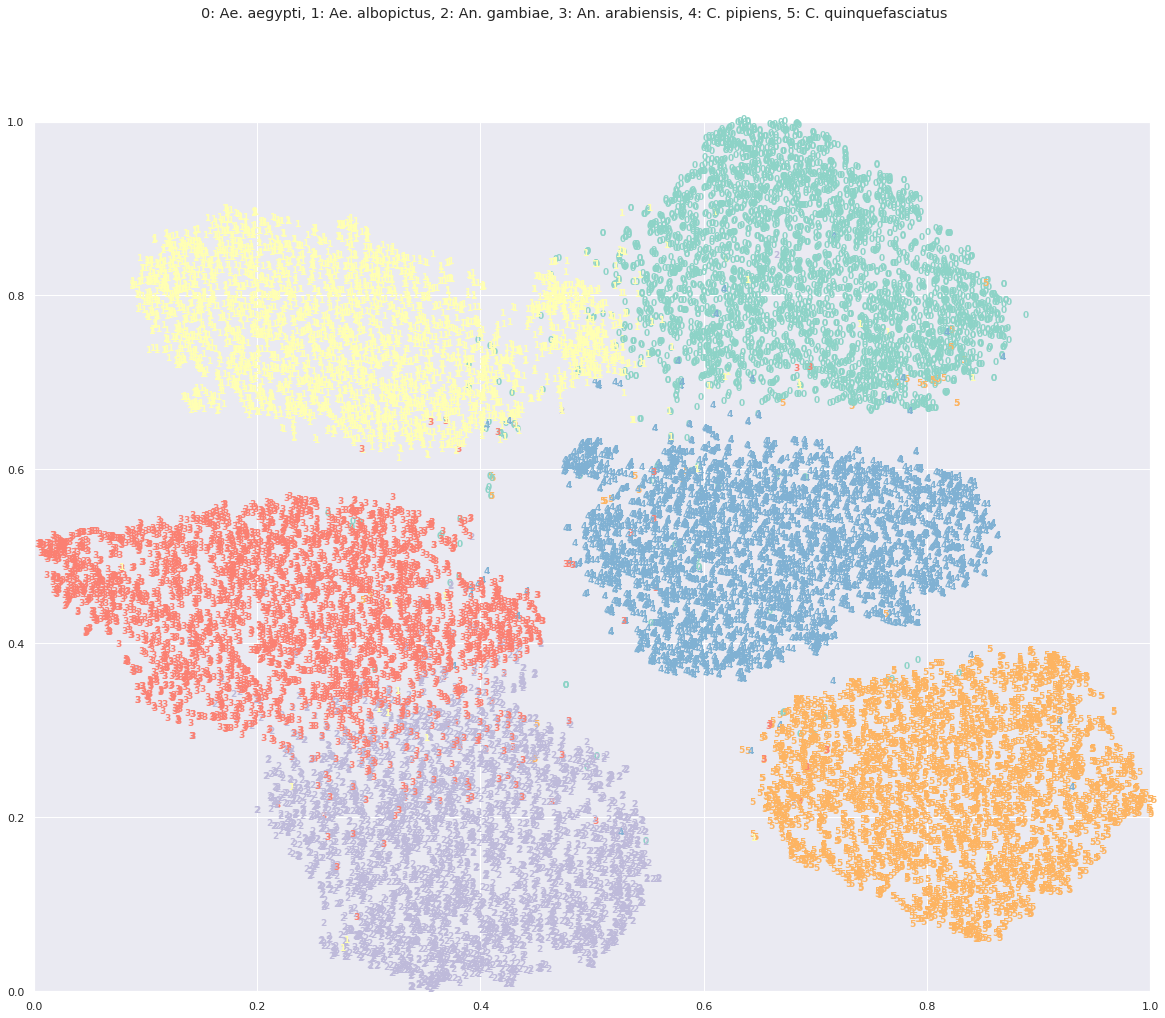

In [175]:
plot_tsne(y_label=y, y_color=y)

## Time (24h)

In [118]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(df.date_hours)
y_hour = lb.transform(df.date_hours)

In [77]:
y_night = list((df.date_hours > 6 ) & (df.date_hours < 18).tolist())
pd.Series(y_night).value_counts()

True     12363
False    10797
dtype: int64

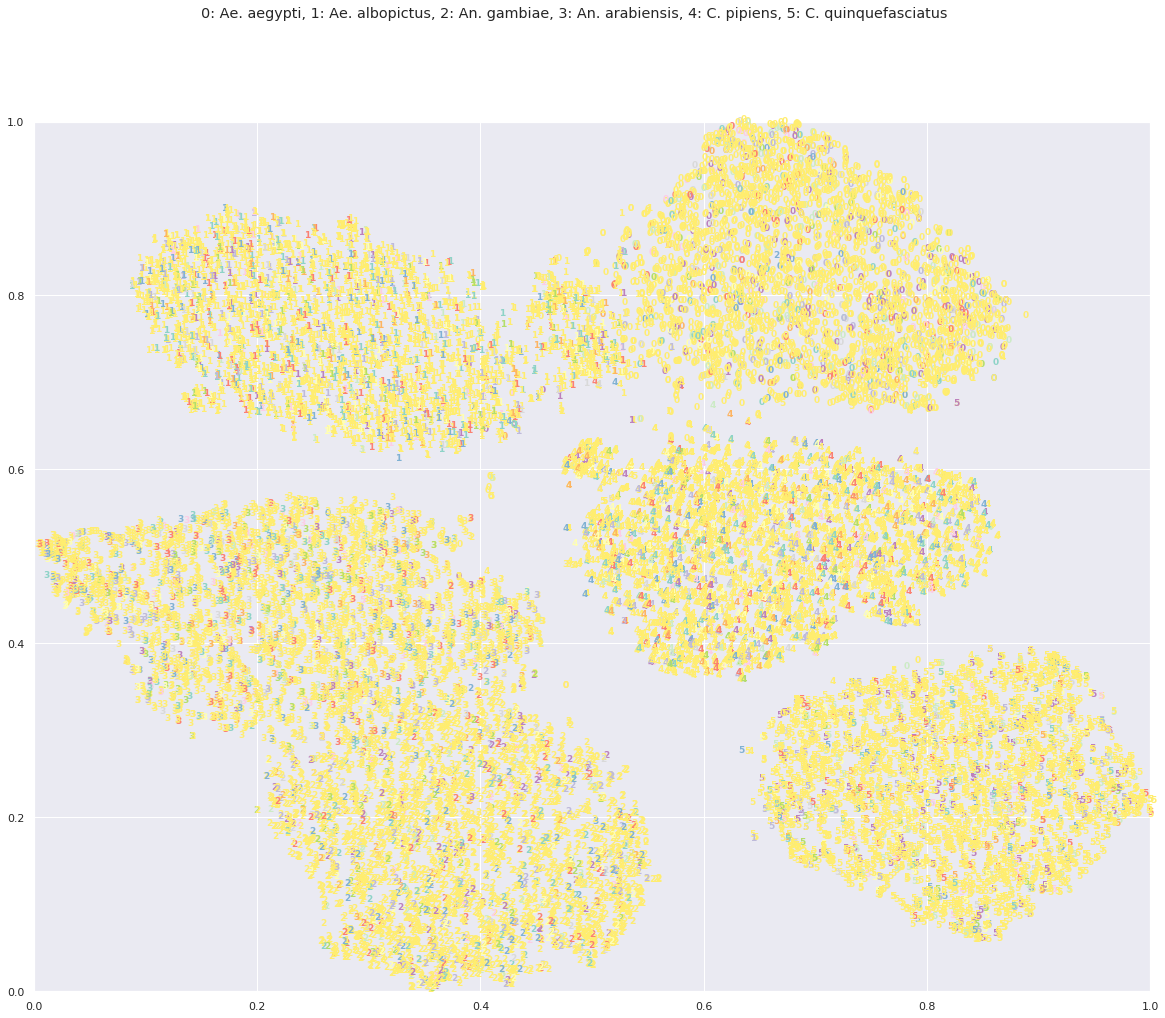

In [119]:
plot_tsne(y_color=y_hour, y_label=y)

## Date (month)

In [109]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
lb.fit(df.date.dt.to_period('m'))

In [114]:
y_month = list(lb.transform(df.date.dt.to_period('m')))

In [100]:
df.date.dt.to_period('m').value_counts()

2017-02    11260
2017-01     4861
2016-12     4282
2017-03     2757
Freq: M, Name: date, dtype: int64

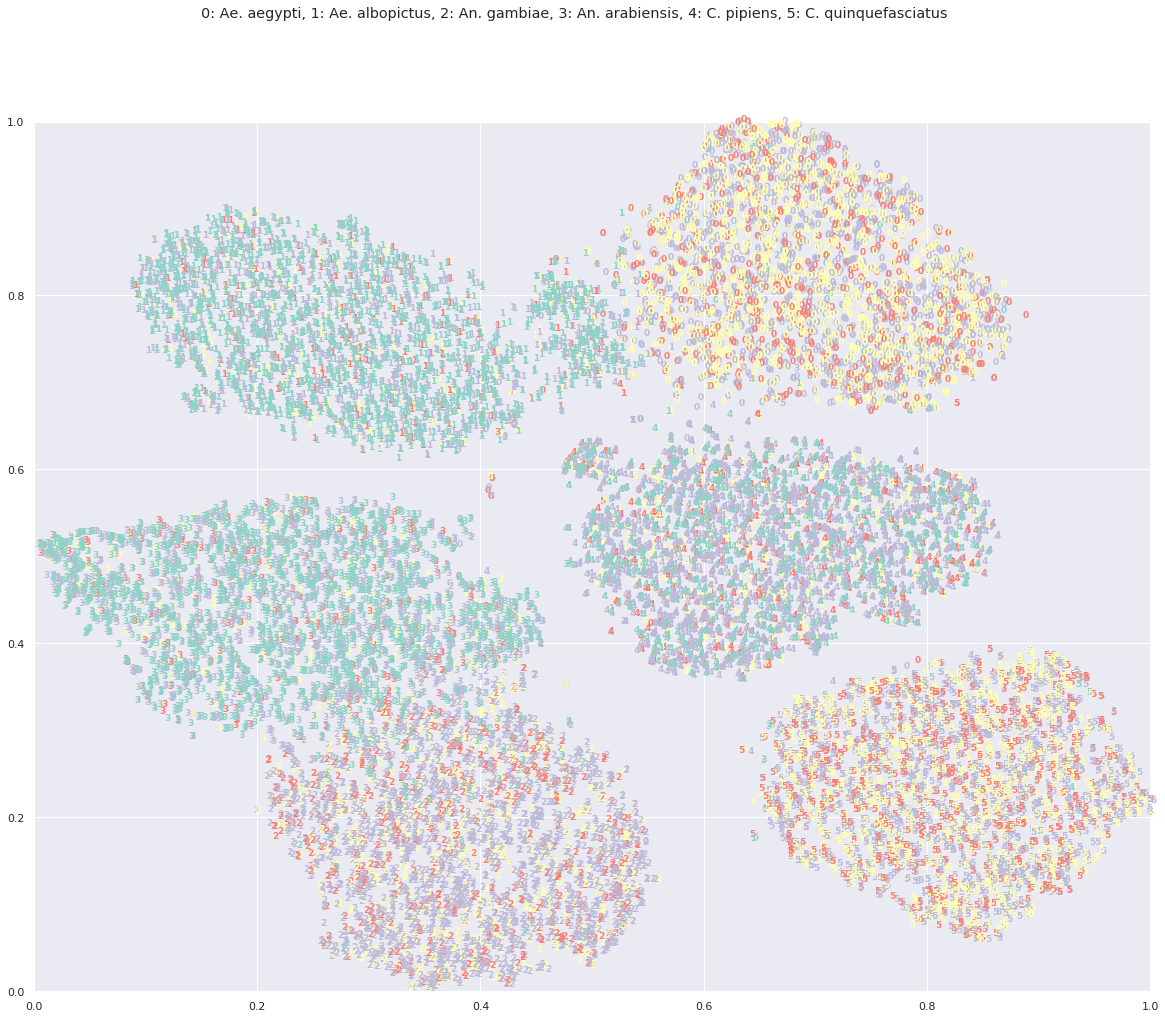

In [115]:
plot_tsne(y_color=y_month, y_label=y)

## Fundamental Frequency

In [120]:
y_fr0 = (df.fr0 > 550).tolist()
pd.Series(y_fr0).value_counts()

True     14533
False     8627
dtype: int64

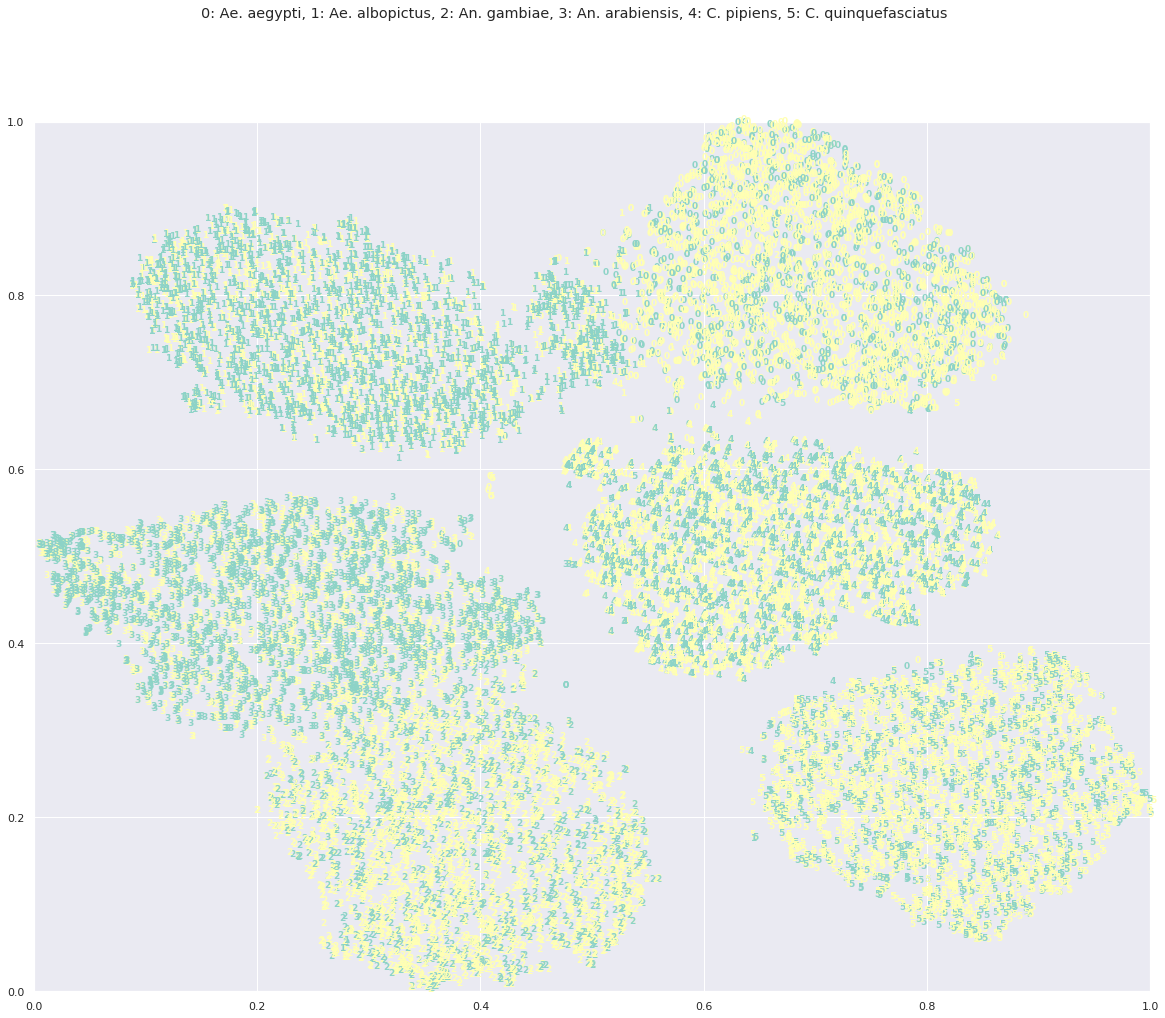

In [121]:
plot_tsne(y_color=y_fr0, y_label=y)

## Small cluster mid-right

In [141]:
selection = (df['X0'] > 0.45) & (df['X0'] < 0.53) & (df['X1'] > 0.58) & (df['X1'] < 0.65)

y_x0 = (selection).tolist()

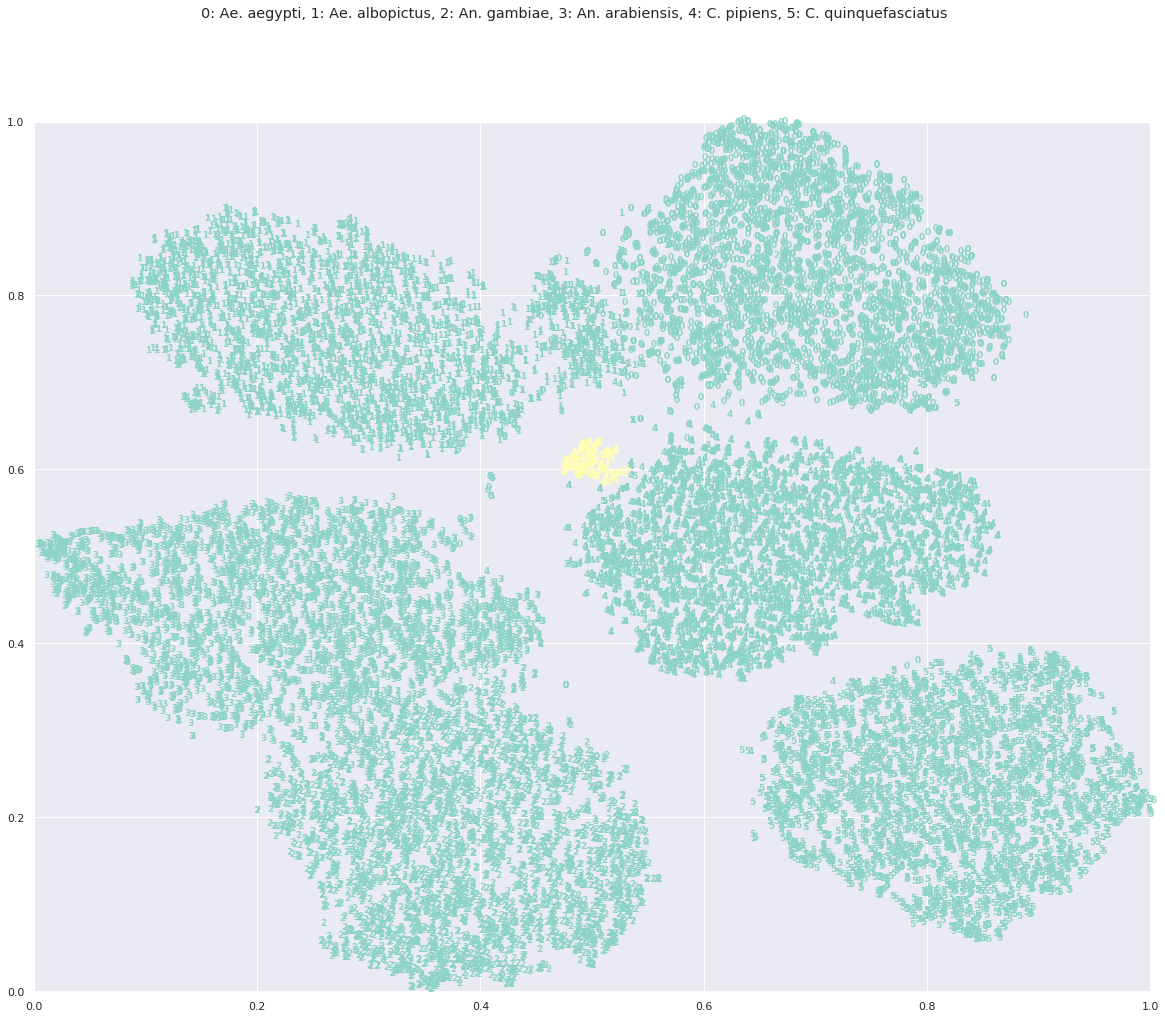

In [140]:
plot_tsne(y_color=y_x0, y_label=y)

In [174]:
df[selection].idx_y.value_counts()

4.0    55
0.0    19
1.0    18
5.0    17
3.0    17
2.0    16
Name: idx_y, dtype: int64